<a href="https://colab.research.google.com/github/minanddoost/Logistic-Regression_Neural-Network/blob/main/neural_network_keras_pictures_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt



In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
print(X_train.shape)
print(X_train.dtype)
print(y_test.shape)
print(y_test.dtype)

(50000, 32, 32, 3)
uint8
(10000, 1)
uint8


y_test

y_test

In [4]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

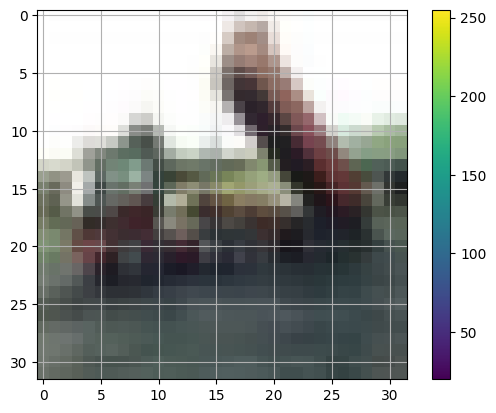

In [5]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(True)
plt.show()


4.	The pixel intensities range from 0 to 255. Normalize pixel values to be between 0 to 1. Set aside a validation set that has 5000 images from the original training set

In [6]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



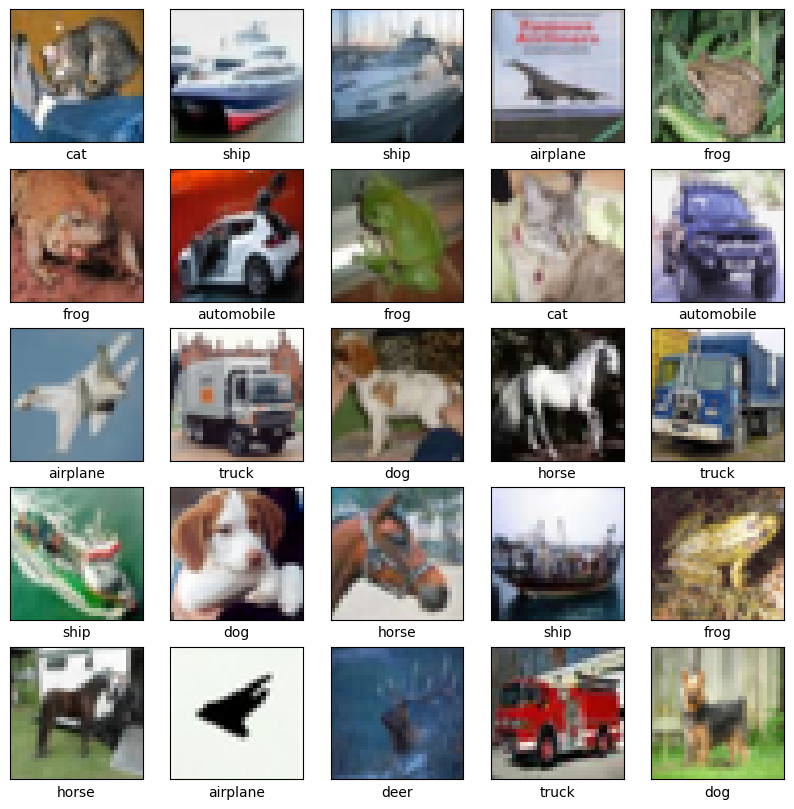

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [9]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history= model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.2697 - loss: 2.0305 - val_accuracy: 0.3820 - val_loss: 1.7135
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3731 - loss: 1.7344 - val_accuracy: 0.4166 - val_loss: 1.6242
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4216 - loss: 1.6205 - val_accuracy: 0.4138 - val_loss: 1.6192
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4320 - loss: 1.5799 - val_accuracy: 0.4420 - val_loss: 1.5523
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4531 - loss: 1.5375 - val_accuracy: 0.4490 - val_loss: 1.5420
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4619 - loss: 1.5030 - val_accuracy: 0.4434 - val_loss: 1.5672
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4689 - loss: 1.4794 - val_accuracy: 0.4560 - val_loss: 1.5055
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4771 -

In [ ]:
history_dict = history.history
history_dict.keys()

pd.DataFrame(history_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)